# CS210 Individual Project | Spring 2019

### Mert Atabey Dincer | 20637

In this project, we will be exploring and analysing a real world dataset which includes taxi trips in a span of two weeks in New York City.

### taxi-trips.cvs (data) file includes:
- id → A unique identifier for each trip.
- vendor_id → A code indicating the provider associated with the trip record.
- pickup_datetime → Date and time when the meter was engaged.
- dropoff_datetime → Date and time when the meter was disengaged.
- passenger_count → The number of passengers in the vehicle.
- pickup_longitude → The longitude where the meter was engaged.
- pickup_latitude → The latitude where the meter was engaged.
- dropoff_longtidue → The longitude where the meter was disengaged.
- dropoff_store_and_fwd_flag → Indicates whether the trip record was held in vehicle memory.
- trip_duration → Duration of the trip in seconds.

### Additional data in this project:
- pickup_district → Valid addresses of given latitude and longitude coordinates. Districts where people leave.
- dropoff_district → Valid addresses of given latitude and longitude coordinates. Districts where people arrive.
- distance → Distance between pickup and dropoff districts in miles. 
- time_of_day → Includes 5 different categories (↓) to represent different time intervals of a day. 
                                        1. Rush hour morning  
                                        2. Afternoon
                                        3. Rush hour evening
                                        4. Evening
                                        5. Late night

### Graphs:

In this project, there will be four different graphs.

1. The top 5 districts where passengers prefer to leave:
This graph collect all districts that passengers prefer to leave and shows top 5 of them with their total number of trip. 

2. The top 5 districts where passengers prefer to arrive:
This graph collect all districts that passengers prefer to arrive and shows top 5 of them with their total number of trip. 

3. Change of the average distance as time of the day changes:
This graph displays average distance of different time of the day such as afternoon or rush hour morning. 

4. Change of the average trip duration as time of the day changes:
This graph shows average trip duration of different time of the day such as rush hour evening or late night. 

### Hypotheses:

There will be two hypotheses:

1. Does passenger group size affect the distance?
   
   • Null hypothesis: passenger group size has no effect on the distance.
   
   • Apply a suitable statistical test and show the results.


2. Do trip distances increase in weekends?
   
   • Null hypothesis: The day of the week has no effect on the distance.
   
   • Again, apply a suitable statistical test and show the results.


 # VERY IMPORTANT!!! 

If project gets the error that:

    IOPub data rate exceeded.
    The notebook server will temporarily stop sending output
    to the client in order to avoid crashing it.
    To change this limit, set the config variable
    `--NotebookApp.iopub_data_rate_limit`.

jupyter notebook has to be started with <font color='red'>"jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000" </font> command in console/terminal rather than just "jupyter notebook". The reason of this, making reverse geocoding process faster. In order to do that coordinates are sent to search() function in an array at once. However, standart data rate limit of jupyter notebook does not allow to create such a large array. By entering "jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000" command to console/terminal, we start jupyter with larger data rate limit which allows us to create a large array to decrease processing time of project from hours to seconds.


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import reverse_geocoder as rg
from os.path import join
from geopy.distance import geodesic
from collections import Counter
import seaborn as sns

%matplotlib inline


## Initial taxi-trips.cvs (data) File

Following cell shows initial format of taxi-trips.cvs (data) file.

In [2]:
d_path = "./data"
filename = "taxi-trips.csv"
df = pd.read_csv(join(d_path, filename))
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755



## Number of Trips

Holds the total number of trips (rows) in integer.

In [3]:
number_of_trips=df.shape[0]


## Pickup Districts
Following cell

In [4]:
pickup_district = []
pickup_coordinates = []

for i in range(number_of_trips):
    pickup_longitude=df.iloc[i, 5]
    pickup_latitude=df.iloc[i, 6]
    coordinate=(pickup_latitude,pickup_longitude)
    pickup_coordinates.append((pickup_latitude,pickup_longitude))

result = rg.search(pickup_coordinates)

for i in range(number_of_trips):
    district=result[i]["name"]+", "+result[i]["admin1"]+", "+result[i]["admin2"]+", "+result[i]["cc"]
    pickup_district.append(district)
    
df["pickup_district"] = pickup_district

Loading formatted geocoded file...



## Dropoff Districts


In [5]:
dropoff_district = []
dropoff_coordinates = []

for i in range(number_of_trips):
    dropoff_longitude=df.iloc[i, 7]
    dropoff_latitude=df.iloc[i, 8]
    coordinate=(dropoff_latitude,dropoff_longitude)
    dropoff_coordinates.append((dropoff_latitude,dropoff_longitude))

result = rg.search(dropoff_coordinates)

for i in range(number_of_trips):
    district=result[i]["name"]+", "+result[i]["admin1"]+", "+result[i]["admin2"]+", "+result[i]["cc"]
    dropoff_district.append(district)
    
df["dropoff_district"] = dropoff_district


## The top 5 districts where passengers prefer to leave


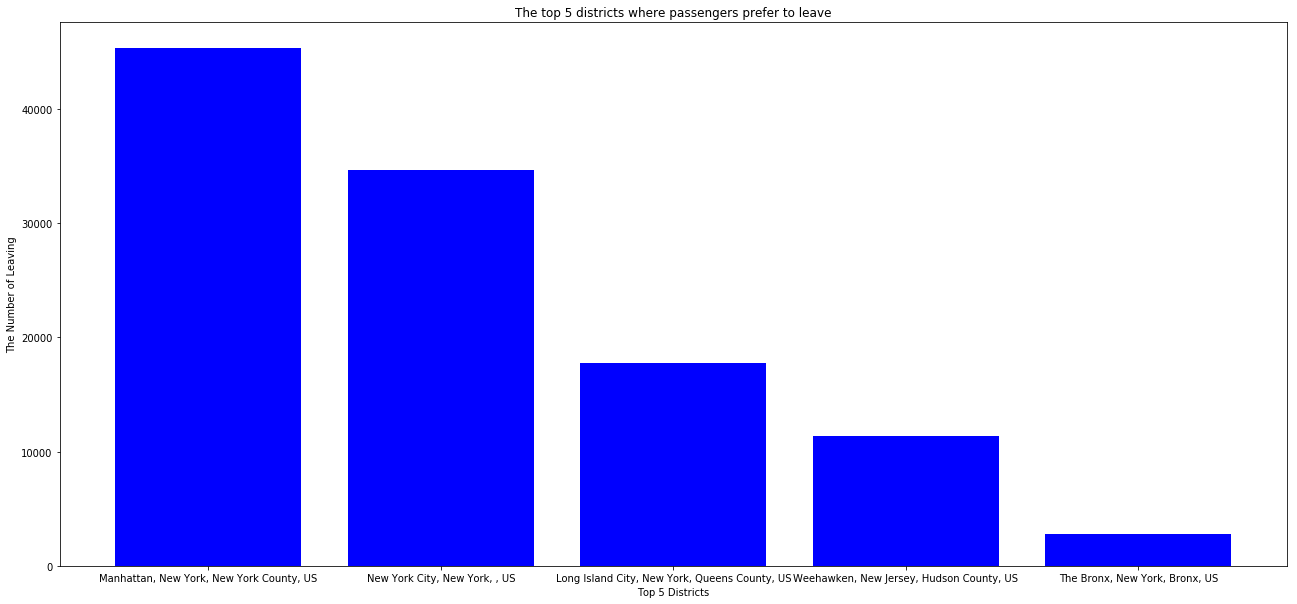

In [6]:
pickup_district_list = []


for i in range(number_of_trips):
    pickup_district = df.iloc[i, 11]
    pickup_district_list.append(pickup_district)
    
pickup_counter = Counter(pickup_district_list)

data = {pickup_counter.most_common(5)[0][0]: pickup_counter.most_common(5)[0][1],
        pickup_counter.most_common(5)[1][0]: pickup_counter.most_common(5)[1][1], 
        pickup_counter.most_common(5)[2][0]: pickup_counter.most_common(5)[2][1],
        pickup_counter.most_common(5)[3][0]: pickup_counter.most_common(5)[3][1],
        pickup_counter.most_common(5)[4][0]: pickup_counter.most_common(5)[4][1]}

names = list(data.keys())
values = list(data.values())

plt.bar(names, values, color='blue')
plt.title("The top 5 districts where passengers prefer to leave")
plt.xlabel("Top 5 Districts")
plt.ylabel("The Number of Leaving")

fig = plt.gcf()
fig.set_size_inches(22,10)

plt.show()



## The top 5 districts where passengers prefer to arrive


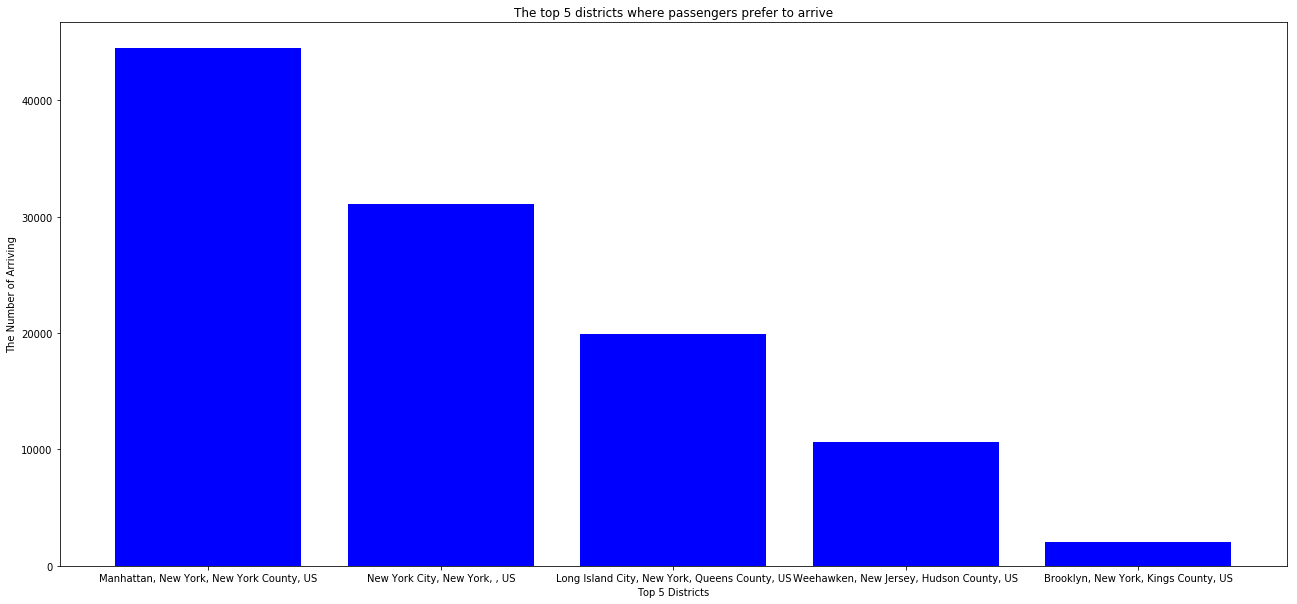

In [7]:
dropoff_district_list = []

for i in range(number_of_trips):
    dropoff_district = df.iloc[i, 12]
    dropoff_district_list.append(dropoff_district)

dropoff_counter = Counter(dropoff_district_list)

data = {dropoff_counter.most_common(5)[0][0]: dropoff_counter.most_common(5)[0][1],
        dropoff_counter.most_common(5)[1][0]: dropoff_counter.most_common(5)[1][1], 
        dropoff_counter.most_common(5)[2][0]: dropoff_counter.most_common(5)[2][1],
        dropoff_counter.most_common(5)[3][0]: dropoff_counter.most_common(5)[3][1],
        dropoff_counter.most_common(5)[4][0]: dropoff_counter.most_common(5)[4][1]}

names = list(data.keys())
values = list(data.values())

plt.bar(names, values, color='blue')
plt.title("The top 5 districts where passengers prefer to arrive")
plt.xlabel("Top 5 Districts")
plt.ylabel("The Number of Arriving")

fig = plt.gcf()
fig.set_size_inches(22,10)

plt.show()


## Distance Between Initial and Final Districts (miles)


In [8]:
distance = []
initial_point=0
final_point=0

pickup_coordinates = []
for i in range(number_of_trips):
    pickup_longitude=df.iloc[i, 5]
    pickup_latitude=df.iloc[i, 6]
    coordinate=(pickup_latitude,pickup_longitude)
    pickup_coordinates.append((pickup_latitude,pickup_longitude))
    
dropoff_coordinates = []
for i in range(number_of_trips):
    dropoff_longitude=df.iloc[i, 7]
    dropoff_latitude=df.iloc[i, 8]
    coordinate=(dropoff_latitude,dropoff_longitude)
    dropoff_coordinates.append((dropoff_latitude,dropoff_longitude))
    
for i in range(number_of_trips):
    current_distance=geodesic(pickup_coordinates[i], dropoff_coordinates[i]).miles
    distance.append(round(current_distance,2))
                    
df["distance"] = distance


## Time of Day


In [9]:
time_of_day = []

for i in range(number_of_trips):
    pickup_time=df.iloc[i, 2]
    
    if pickup_time[11]=="0":
        pickup_time=pickup_time[12]
    else:
        pickup_time=pickup_time[11:13]
        
    
    if int(pickup_time)>=7 and int(pickup_time)<=9:
        time_of_day.append("Rush Hour Morning")
    elif int(pickup_time)>=9 and int(pickup_time)<=16:
        time_of_day.append("Afternoon")
    elif int(pickup_time)>=16 and int(pickup_time)<=18:
        time_of_day.append("Rush Hour Evening")
    elif int(pickup_time)>=18 and int(pickup_time)<=23:
        time_of_day.append("Evening")
    elif int(pickup_time)>=23 or int(pickup_time)<=7:
        time_of_day.append("Late Night")

df["time_of_day"] = time_of_day

## Uptated taxi-trips.cvs (data) File

In [10]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,"Manhattan, New York, New York County, US","Manhattan, New York, New York County, US",0.93,Rush Hour Evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,"Long Island City, New York, Queens County, US","Manhattan, New York, New York County, US",3.18,Evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,"Weehawken, New Jersey, Hudson County, US","Manhattan, New York, New York County, US",0.93,Rush Hour Morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,"Manhattan, New York, New York County, US","Long Island City, New York, Queens County, US",1.23,Afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,"New York City, New York, , US","New York City, New York, , US",1.56,Afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,"Hoboken, New Jersey, Hudson County, US","New York City, New York, , US",2.49,Evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,"Manhattan, New York, New York County, US","Weehawken, New Jersey, Hudson County, US",2.65,Evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,"Manhattan, New York, New York County, US","Manhattan, New York, New York County, US",0.45,Afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,"New York City, New York, , US","New York City, New York, , US",1.37,Evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,"Long Island City, New York, Queens County, US","East New York, New York, Kings County, US",1.81,Late Night



## Change of the average distance as time of the day changes


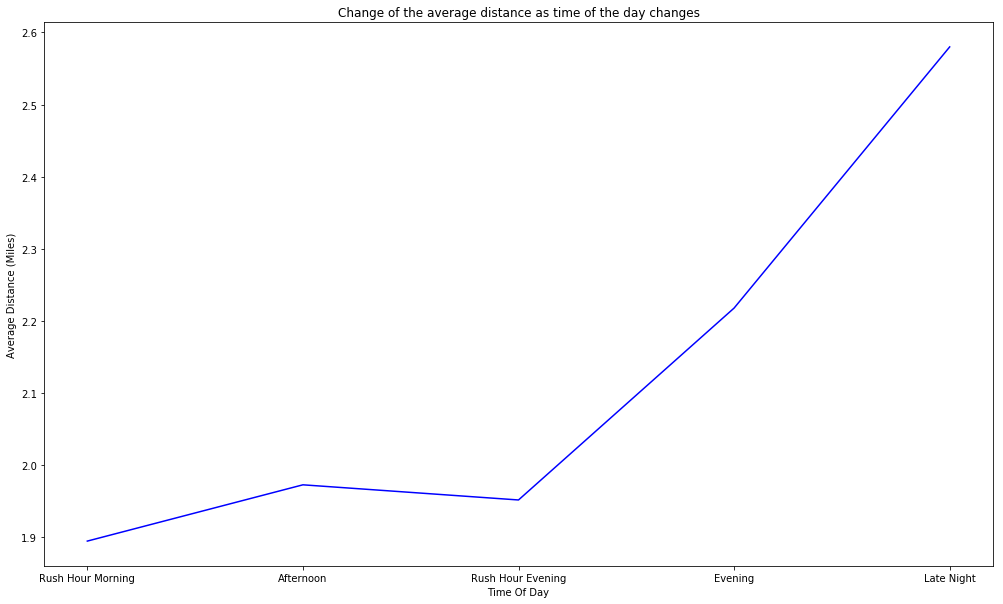

In [11]:
rush_hour_morning_distance = 0
rush_hour_morning_counter = 0
afternoon_distance = 0
afternoon_counter = 0
rush_hour_evening_distance = 0
rush_hour_evening_counter = 0
evening_distance = 0
evening_counter = 0
late_night_distance = 0
late_night_counter = 0

for i in range(number_of_trips):
    time_of_day = df.iloc[i, 14]
    distance = df.iloc[i, 13]
    
    if time_of_day=="Rush Hour Morning":
        rush_hour_morning_distance=rush_hour_morning_distance+distance
        rush_hour_morning_counter=rush_hour_morning_counter+1
    elif time_of_day=="Afternoon":
        afternoon_distance=afternoon_distance+distance
        afternoon_counter=afternoon_counter+1
    elif time_of_day=="Rush Hour Evening":
        rush_hour_evening_distance=rush_hour_evening_distance+distance
        rush_hour_evening_counter=rush_hour_evening_counter+1
    elif time_of_day=="Evening":
        evening_distance=evening_distance+distance
        evening_counter=evening_counter+1
    elif time_of_day=="Late Night":
        late_night_distance=late_night_distance+distance
        late_night_counter=late_night_counter+1

average_distance_rush_hour_morning = rush_hour_morning_distance/rush_hour_morning_counter
average_distance_afternoon = afternoon_distance/afternoon_counter
average_distance_rush_hour_evening = rush_hour_evening_distance/rush_hour_evening_counter
average_distance_evening = evening_distance/evening_counter
average_distance_late_night = late_night_distance/late_night_counter


data = {'Rush Hour Morning': round(average_distance_rush_hour_morning,3),
        'Afternoon': round(average_distance_afternoon,3), 
        'Rush Hour Evening': round(average_distance_rush_hour_evening,3),
        'Evening': round(average_distance_evening,3),
        'Late Night': round(average_distance_late_night,3)}

names = list(data.keys())
values = list(data.values())

plt.plot(names, values, color='blue')
plt.title("Change of the average distance as time of the day changes")
plt.xlabel("Time Of Day")
plt.ylabel("Average Distance (Miles)")

fig = plt.gcf()
fig.set_size_inches(17,10)

plt.show()


## Change of the average trip duration as time of the day changes

In [ ]:
##### rush_hour_morning_trip_duration = 0
rush_hour_morning_counter = 0
afternoon_trip_duration = 0
afternoon_counter = 0
rush_hour_evening_trip_duration = 0
rush_hour_evening_counter = 0
evening_trip_duration = 0
evening_counter = 0
late_night_trip_duration = 0
late_night_counter = 0

for i in range(number_of_trips):
    time_of_day = df.iloc[i, 14]
    trip_duration = df.iloc[i, 10]
    
    if time_of_day=="Rush Hour Morning":
        rush_hour_morning_trip_duration=rush_hour_morning_trip_duration+trip_duration
        rush_hour_morning_counter=rush_hour_morning_counter+1
    elif time_of_day=="Afternoon":
        afternoon_trip_duration=afternoon_trip_duration+trip_duration
        afternoon_counter=afternoon_counter+1
    elif time_of_day=="Rush Hour Evening":
        rush_hour_evening_trip_duration=rush_hour_evening_trip_duration+trip_duration
        rush_hour_evening_counter=rush_hour_evening_counter+1
    elif time_of_day=="Evening":
        evening_trip_duration=evening_trip_duration+trip_duration
        evening_counter=evening_counter+1
    elif time_of_day=="Late Night":
        late_night_trip_duration=late_night_trip_duration+trip_duration
        late_night_counter=late_night_counter+1

average_trip_duration_rush_hour_morning = rush_hour_morning_trip_duration/rush_hour_morning_counter
average_trip_duration_afternoon = afternoon_trip_duration/afternoon_counter
average_trip_duration_rush_hour_evening = rush_hour_evening_trip_duration/rush_hour_evening_counter
average_trip_duration_evening = evening_trip_duration/evening_counter
average_trip_duration_late_night = late_night_trip_duration/late_night_counter

data = {'Rush Hour Morning': round(average_trip_duration_rush_hour_morning,2),
        'Afternoon': round(average_trip_duration_afternoon,2), 
        'Rush Hour Evening': round(average_trip_duration_rush_hour_evening,2),
        'Evening': round(average_trip_duration_evening,2),
        'Late Night': round(average_trip_duration_late_night,2)}

names = list(data.keys())
values = list(data.values())

plt.plot(names, values, color='blue')
plt.title("Change of the average trip duration as time of the day changes")
plt.xlabel("Time Of Day")
plt.ylabel("Average Trip Duration (Seconds)")

fig = plt.gcf()
fig.set_size_inches(17,10)

plt.show()

## Hypothesis

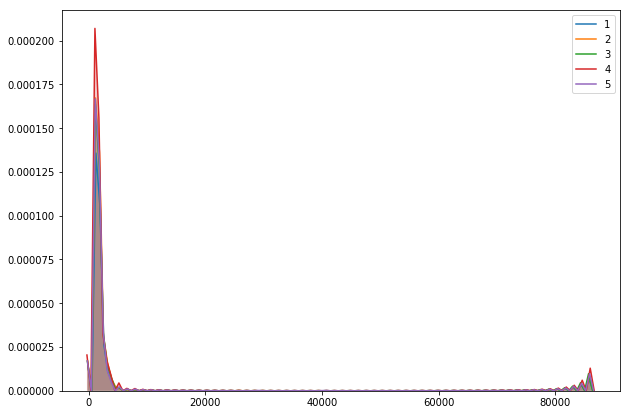

In [30]:
a=df[df["passenger_count"] == 1]["trip_duration"]
b=df[df["passenger_count"] == 2]["trip_duration"]
c=df[df["passenger_count"] == 3]["trip_duration"]
d=df[df["passenger_count"] == 4]["trip_duration"]
e=df[df["passenger_count"] == 5]["trip_duration"]


fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.kdeplot(a, shade=True, ax=ax, label="1")
sns.kdeplot(b, shade=True, ax=ax, label="2")
sns.kdeplot(c, shade=True, ax=ax, label="3")
sns.kdeplot(d, shade=True, ax=ax, label="4")
sns.kdeplot(e, shade=True, ax=ax, label="5")

plt.title("")
plt.show()